In [84]:
import json
import numpy as np
import matplotlib.pyplot as plt
import itertools

In [62]:
with open("sondes.json") as f:
    sondes = json.load(f)
    
with open("malo.json") as f:
    malo = json.load(f)

In [63]:
KEY = "c2si-oral"

In [64]:
sondes[KEY] = np.array(sondes[KEY])
malo[KEY] = np.array(malo[KEY]) * 100

In [65]:
sondes[KEY]

array([[58.7,  2.8,  1. ,  1.1,  0. ,  0. ,  0.4,  0.8,  0.1, 20.2,  3.4,
         1.5],
       [ 1. , 78.9,  3. ,  0.1,  0.1,  1.3,  2.2,  0. ,  0. ,  1.8,  0.6,
         0.4],
       [ 1.1,  4.5, 62.2,  6.1,  1.4,  1.6,  0.1,  0.7,  0.4,  4.5,  1.9,
         1.2],
       [ 1.1,  0. ,  0. , 67.6, 14.4,  0. ,  0. ,  0.9,  4.2,  0.3,  0.5,
         0.2],
       [ 0. ,  0. ,  0.4,  2.8, 85.4,  0.2,  0. ,  0. ,  0.7,  1. ,  0.6,
         1. ],
       [ 0. ,  0.6,  1.4,  0. ,  0.6, 79.1,  1.5,  0. ,  0. ,  0. ,  1.5,
         1.7],
       [ 0.1,  3.1,  0.2,  0. ,  0.4,  1.2, 79. ,  0. ,  0. ,  0. ,  1.7,
         0.3],
       [11.5,  0.2,  0.3,  1.7,  0.8,  0. ,  0. , 10.2,  4.9, 14.4,  8.4,
         6.2],
       [ 0.7,  0.2,  0.5,  6.9,  6.2,  0. ,  0. ,  8.3, 51.6,  2.2,  2.1,
         4.6],
       [ 4.8, 17.9,  2.5,  0.5,  0.5,  0. ,  0. ,  1. ,  0.8, 54.1,  6.2,
         3.4],
       [ 0.3,  1.1,  2.1,  0.4,  1.7,  0.1,  1.3,  0. ,  0.1,  1. , 69.4,
        11.4],
       [ 0.5,  1.5,  

In [66]:
malo[KEY]

array([[6.01096892e+01, 1.46252285e+00, 1.57221207e+00, 1.35283364e+00,
        7.31261426e-02, 1.46252285e-01, 3.65630713e-02, 5.48446069e-01,
        0.00000000e+00, 1.64533821e+01, 3.91224863e+00, 2.92504570e+00],
       [8.78638111e-01, 7.76313381e+01, 3.13014827e+00, 1.83049606e-01,
        0.00000000e+00, 9.70162914e-01, 1.95863079e+00, 0.00000000e+00,
        9.15248032e-02, 6.58978583e-01, 4.94233937e-01, 7.87113308e-01],
       [1.73323286e+00, 3.61718161e+00, 6.92916353e+01, 2.29841748e+00,
        6.02863602e-01, 5.65184627e-01, 2.63752826e-01, 2.26073851e-01,
        0.00000000e+00, 1.80859081e+00, 1.92162773e+00, 1.24340618e+00],
       [1.53110048e+00, 9.56937799e-02, 0.00000000e+00, 7.80861244e+01,
        3.73205742e+00, 0.00000000e+00, 0.00000000e+00, 1.05263158e+00,
        7.65550239e-01, 6.69856459e-01, 1.33971292e+00, 2.39234450e+00],
       [0.00000000e+00, 0.00000000e+00, 9.67982130e-01, 6.62695458e+00,
        7.57259866e+01, 7.44601638e-02, 2.97840655e-01, 0.00

In [70]:
difference = malo[KEY] - sondes[KEY]
maximum = np.maximum(malo[KEY], sondes[KEY])
difference

array([[ 1.40968920e+00, -1.33747715e+00,  5.72212070e-01,
         2.52833640e-01,  7.31261426e-02,  1.46252285e-01,
        -3.63436929e-01, -2.51553931e-01, -1.00000000e-01,
        -3.74661790e+00,  5.12248630e-01,  1.42504570e+00],
       [-1.21361889e-01, -1.26866190e+00,  1.30148270e-01,
         8.30496060e-02, -1.00000000e-01, -3.29837086e-01,
        -2.41369210e-01,  0.00000000e+00,  9.15248032e-02,
        -1.14102142e+00, -1.05766063e-01,  3.87113308e-01],
       [ 6.33232860e-01, -8.82818390e-01,  7.09163530e+00,
        -3.80158252e+00, -7.97136398e-01, -1.03481537e+00,
         1.63752826e-01, -4.73926149e-01, -4.00000000e-01,
        -2.69140919e+00,  2.16277300e-02,  4.34061800e-02],
       [ 4.31100480e-01,  9.56937799e-02,  0.00000000e+00,
         1.04861244e+01, -1.06679426e+01,  0.00000000e+00,
         0.00000000e+00,  1.52631580e-01, -3.43444976e+00,
         3.69856459e-01,  8.39712920e-01,  2.19234450e+00],
       [ 0.00000000e+00,  0.00000000e+00,  5.6798213

In [91]:
who_better = difference.copy()
mine = []
hers = []
for i, j in itertools.product(range(maximum.shape[0]), range(maximum.shape[1])):
    diff = round(difference[i, j], 1)
    if i == j:
        if diff == 0.0:
            who_better[i, j] = 0
        elif diff > 0.0:
            who_better[i, j] = 10
            mine += [diff]
        else:
            who_better[i, j] = -10
            hers += [diff]
    else:
        if diff == 0.0:
            who_better[i, j] = 0
        elif diff > 0.0:
            who_better[i, j] = -10
            hers += [diff]
        else:
            who_better[i, j] = 10
            mine += [diff]

In [75]:
def linear_mapping_function(x1, y1, x2, y2):
    # Calculate the slope and intercept of the linear equation
    slope = (y2 - y1) / (x2 - x1)
    intercept = y1 - slope * x1

    # Define the linear mapping lambda function
    return lambda x: slope * x + intercept


def get_sign_text(value, x, y) -> str:
    value = round(value, 1)
    if value == 0.0:
        return "="
    
    if x == y:
        if value > 0.0:
            return "+"
        return "-"
    else:
        if value > 0.0:
            return "-   "
        return "+"

-10.66794258 25.4334842


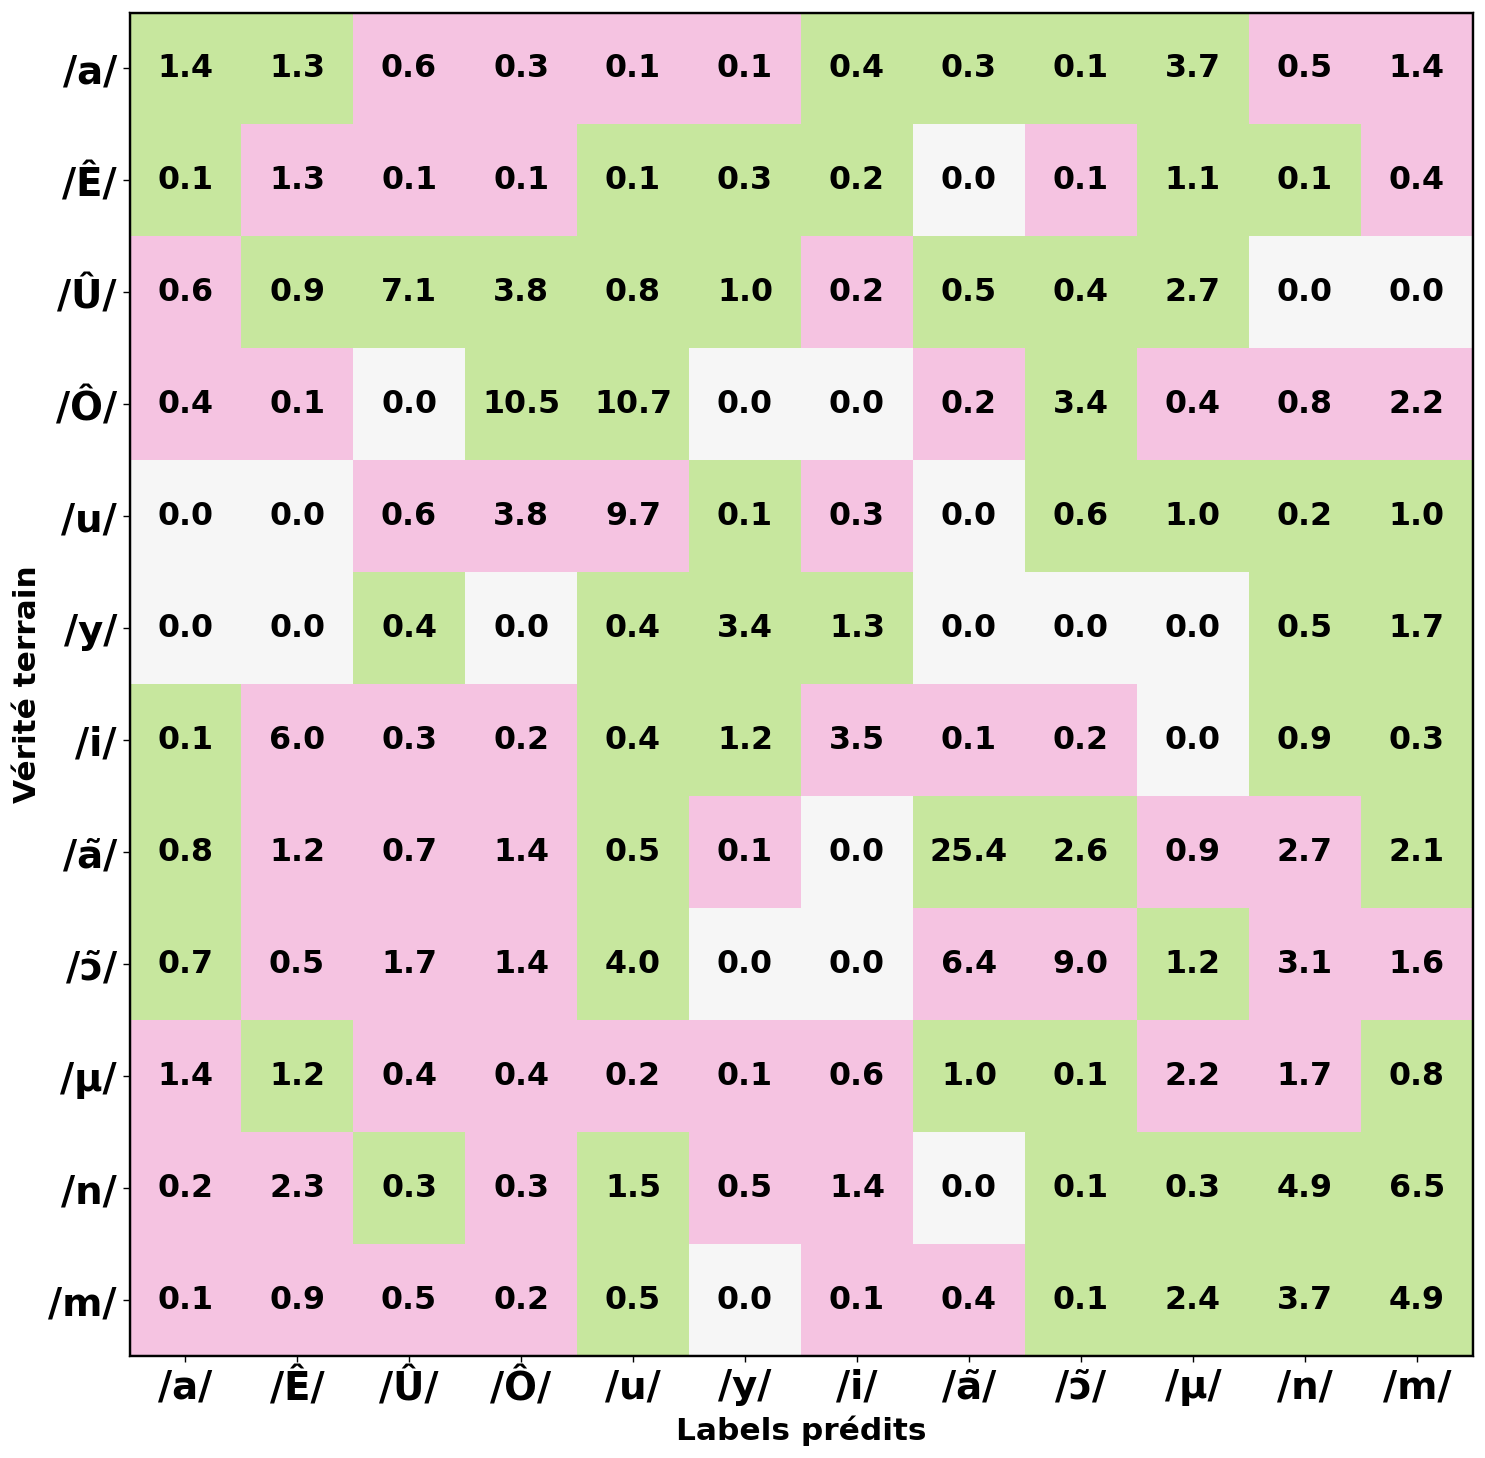

In [90]:
fig, ax = plt.subplots(dpi=125)
fig.set_size_inches(15, 12, forward=True)

rect = plt.Rectangle((-0.5, -0.5), maximum.shape[1], maximum.shape[0], linewidth=2, edgecolor='black', facecolor='none')
ax.add_patch(rect)

print(np.min(difference), np.max(difference))
im = ax.imshow(who_better, interpolation='nearest', cmap=plt.cm.PiYG, vmin=-30, vmax=30)

# labels = ["p", "t", "k", "b", "d", "g", "f", "s", "ʃ", "v", "z", "ʒ"]
labels = ["a", "Ê", "Û", "Ô", "u", "y", "i", "ã", "ɔ̃", "µ", "n", "m"]

tick_marks = np.arange(len(labels))
ax.set_xticks(tick_marks)
ax.set_yticks(tick_marks)

fontsize = linear_mapping_function(1, 27, 31, 14)(len(labels))
ax.set_xticklabels([f"/{a}/" for a in labels], fontsize=fontsize, weight='bold')
ax.set_yticklabels([f"/{a}/" for a in labels], fontsize=fontsize, weight='bold')

ax.grid(False)

fontsize = linear_mapping_function(1, 23, 31, 10)(len(labels))
for i, j in itertools.product(range(maximum.shape[0]), range(maximum.shape[1])):
    color = "black"  #"white" if maximum[i, j] > 60.0 else "black"
    ax.text(j, i, round(np.abs(difference[i, j]), 1), ha="center", va="center", color=color, fontsize=fontsize, weight='bold')

plt.tight_layout(pad=3)
ax.set_ylabel('Vérité terrain', fontsize=18, weight='bold')
ax.set_xlabel('Labels prédits', fontsize=18, weight='bold')

plt.savefig("c2si-oral.pdf", bbox_inches='tight', pad_inches=0.1)

In [98]:
np.median(np.abs(mine)), np.mean(np.abs(mine)), np.std(np.abs(mine))

(0.9, 2.096774193548387, 3.7459211254434734)

In [97]:
np.median(np.abs(mine)), np.mean(np.abs(hers)), np.std(np.abs(hers))

(0.9, 1.298360655737705, 1.9667308151945033)

In [99]:
np.median(difference), np.mean(difference), np.std(difference)

(0.0, 0.08960557001527775, 3.2066133281763394)